# NBA All Star predictor

Predict wether a player will be an all star based on rookie year stats

https://www.youtube.com/watch?v=0B5eIE_1vpU

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import csv
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

# 1. Collecting Data 
Using NBA Stats API

https://www.youtube.com/watch?v=IELK56jIsEo

In [5]:
season_list = [
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19',
    '2019-20',
    '2020-21'
]

headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

dfs = [] 

In [6]:
for season in season_list:
    
    url = f'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=Rookie&PlayerPosition=&PlusMinus=N&Rank=N&Season={season}&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='
    
    #json response
    response = requests.get(url, headers=headers).json() 
    
    #data frame params
    player_info = response['resultSets'][0]['rowSet']
    col = response['resultSets'][0]['headers']
    
    df = pd.DataFrame(data = player_info, columns = col)
    df['season_id'] = season
    
    dfs.append(df)

In [7]:
nba_data = pd.concat(dfs, sort=False, ignore_index=True) #creating data frame of all seasons

In [8]:
# nba_data.tail(10)

In [9]:
# nba_data.columns

# 2. Preprocessing Data

In [10]:
useless_cols = ['PLAYER_ID', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'W_PCT',  'WNBA_FANTASY_PTS', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'CFID', 'CFPARAMS',
       'season_id']

#removing usesless data aka. feature selection :) 
data = nba_data.drop(labels=useless_cols, axis=1)
# data.sample(10)

In [11]:
#player identifier dict
player_ident = dict(zip(data.index, data.PLAYER_NAME))

# for i in range(10):
#     print(i, player_ident[i])

In [12]:
all_star_list = pd.read_csv('all_star_list.csv').to_numpy()
# all_star_list

In [33]:
#making a columns saying if player is was all star or not, 0 = not all star 1 = all star

data['ALL_STAR'] = 0

players = data.PLAYER_NAME
for i in players.index:
    
    if players[i] in all_star_list:
            count+=1
            data['ALL_STAR'].iloc[i] = 1
            
# data.sample(20)

In [34]:
# no fucking clue why glen rice jr dosent have jr in his name, like THJ didnt have this problem lol
data.at[369, 'ALL_STAR'] = 0
# data.iloc[369]

# 2.1 Exploring the Data 
and doing manual feature selection

In [15]:
#finding correlations in data
corr = data.corr()

#creating upper triangluar matrix to only show relevent correlations
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

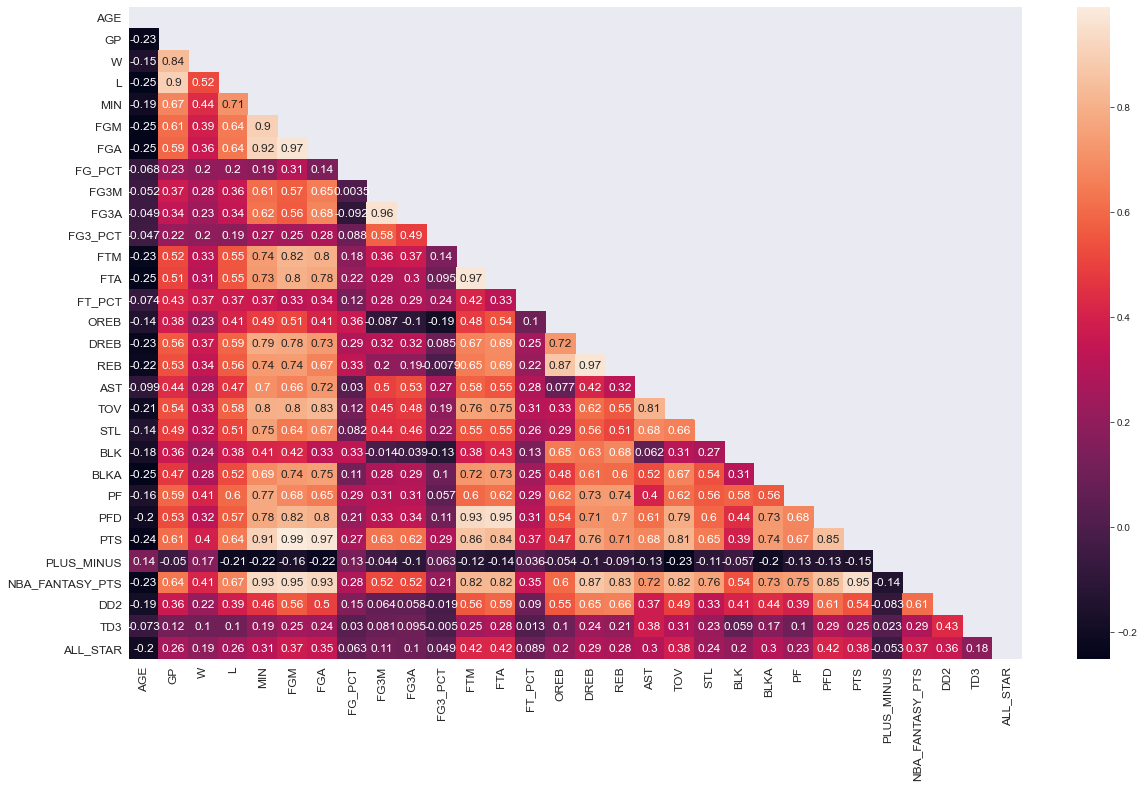

In [27]:
#plotting cuz pretty
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':12})
sns.set_style('dark')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

somethings have a very high corr (ex. pfd and fta/ftm, pts and fga/fgm) might do more feature selection if needed

In [17]:
#stats and their correlation to being an all star or not
#Seems like  have least correlation
corr.iloc[29] 

AGE               -0.196937
GP                 0.260248
W                  0.189512
L                  0.256862
MIN                0.310932
FGM                0.372659
FGA                0.350864
FG_PCT             0.063114
FG3M               0.114847
FG3A               0.101677
FG3_PCT            0.049427
FTM                0.419874
FTA                0.420392
FT_PCT             0.088675
OREB               0.202420
DREB               0.286056
REB                0.275362
AST                0.300510
TOV                0.381273
STL                0.242454
BLK                0.199155
BLKA               0.297134
PF                 0.229385
PFD                0.417190
PTS                0.378884
PLUS_MINUS        -0.053480
NBA_FANTASY_PTS    0.372108
DD2                0.361503
TD3                0.183668
ALL_STAR           1.000000
Name: ALL_STAR, dtype: float64

# 2.2 Splitting and Scaling Data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = data.drop(columns=['PLAYER_NAME','ALL_STAR', 'FG_PCT','FG3_PCT','FT_PCT', 'PLUS_MINUS'], inplace = False)
y = data['ALL_STAR']

In [20]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,             
                                                    test_size=0.30) 

In [21]:
#Scaling
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

In [31]:
f"# All stars={y.sum(0)}, # players={X.shape[0]}"
#rather unbalanced data set innit

'# All stars=56, # players=1096'

# 3. Model selection

things to adjust for:

metric - i think recall is going to be important cuz its better to predict an all star might just be a solid role player rather than missing an potential all star. Accuracy will porbably be a poor metric since the null acc is very high

network art

params (add class weight since it is a very unbalanced data set)

In [45]:
#null acc to compare model preformance to

null_acc = max(y_test.mean(), 1-y_test.mean())
print(null_acc)

0.9544072948328267


# 4. Training Model

# 5. Evaluating Model

# 6. Parameter Tunning

# 7. Preditions